In [303]:
from nptdms import TdmsFile as TF
import numpy as np
import pandas as pd
import datetime
import matplotlib as mplt
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
%matplotlib inline


In [2]:
Xfile = TF('D:\\Data\\DiscsPrelim\\HeatGun\\X.tdms')

In [3]:
XYfile = TF('D:\\Data\\DiscsPrelim\\HeatGun\\XY.tdms')

In [4]:
X = Xfile.object('Sensors').as_dataframe()
X['motor'] = Xfile.object('Motors', 'Motor B').data
time = Xfile.object('Global', 'Time').data
t = time[0]
b.index = [(i-t).total_seconds() for i in time]

ValueError: Length of values does not match length of index

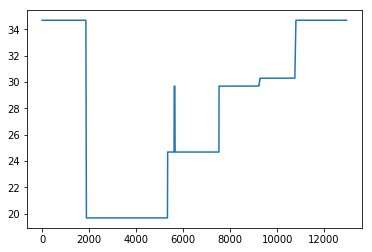

In [112]:
XY = XYfile.object('Sensors').as_dataframe()
XY['motorA'] = XYfile.object('Motors', 'motor A').data
XY['motorB'] = XYfile.object('Motors', 'Motor B').data
time = XYfile.object('Global', 'Time').data
t = time[0]
XY.index = [(i-t).total_seconds() for i in time]
plt.plot(XY['motorA'])

In [113]:
def section(arr):
    inds = []
    for i, a in enumerate(arr[:-2]):
        if (arr[i] == arr[i+1])&(a not in inds):
            print('added', i)
            inds = np.append(inds, a)
    return inds
section(Ys.values)

added 0
added 7428
added 11108
added 21137
added 22130
added 22254
added 22257
added 22307
added 22444
added 36525
added 36583
added 36614
added 36639
added 36670
added 36706
added 36765
added 42764
added 42773


array([ 34.68820849,  19.68820675,  19.68936562,  24.68760937,
        24.68819674,  29.68863124,  29.68823437,  29.68818674,
        24.68919687,  29.78819924,  29.88821174,  29.98822424,
        30.08823674,  30.18824924,  30.28826174,  30.28910312,
        34.68925624,  34.68827199])

In [114]:
XY = XY.set_index('motorA', append=True)

added 0
added 7428
added 11108
added 21137
added 22130
added 22254
added 22257
added 22307
added 22444
added 36525
added 36583
added 36614
added 36639
added 36670
added 36706
added 36765
added 42764
added 42773


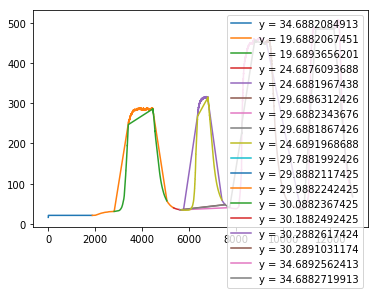

In [163]:
we = section(Ys.values)
wes = np.append([we[5], we[6], we[7]], we[9:16])

for ind in we:
    plt.plot(XY.xs(ind, level='motorA')['T_per_1'], label = 'y = '+str(ind))
    plt.legend()

In [218]:
y1 = pd.concat([XY.xs(we[1], level='motorA'), XY.xs(we[2], level='motorA')]).sort_index()
y2 = pd.concat([XY.xs(we[4],level='motorA'), XY.xs(we[8],level='motorA')]).sort_index()
y4 = pd.concat([XY.xs(we[-2],level='motorA'),XY.xs(we[-1],level='motorA')]).sort_index()
y3 = pd.concat([XY.xs(this, level='motorA') for this in wes]).sort_index()


In [347]:
def pltt(y3, ends):
    l,r = ends
    p = np.polyfit(y3.index[l:r], y3['T_par_1'].iloc[l:r], 4)
    plt.plot(y3.index[l:r],np.polyval(p, y3.index[l:r]), label = 'PolyFit', ls='dashed', c='C0')
    plt.plot(y3.index[l-150:r+150], y3['T_par_1'].iloc[l-150:r+150], label='Measured', c='C0')
    po = np.polyfit(y3.index[l:r], y3['T_par_2'].iloc[l:r], 4)
    plt.plot(y3.index[l:r],np.polyval(po, y3.index[l:r]), label = 'PolyFit', ls='dashed', c='C1')
    plt.plot(y3.index[l-150:r+150], y3['T_par_2'].iloc[l-150:r+150], label='Measured', c='C1')
    pol = np.polyfit(y3.index[l:r], y3['T_per_1'].iloc[l:r], 4)
    plt.plot(y3.index[l:r],np.polyval(pol, y3.index[l:r]), label = 'PolyFit', ls='dashed', c='C2')
    plt.plot(y3.index[l-150:r+150], y3['T_per_1'].iloc[l-150:r+150], label='Measured', c='C2')
    pols = np.polyfit(y3.index[l:r], y3['T_per_2'].iloc[l:r], 4)
    plt.plot(y3.index[l:r],np.polyval(pols, y3.index[l:r]), label = 'PolyFit', ls='dashed', c='C3')
    plt.plot(y3.index[l-150:r+150], y3['T_per_2'].iloc[l-150:r+150], label='Measured', c='C3')
    cs = [Line2D([0], [0], color='C1'),
          Line2D([0], [0], color='C2'),
          Line2D([0], [0], color='C0'),
          Line2D([0], [0], color='C3')]
    ss = [Line2D([0], [0], color = 'k'), 
          Line2D([0], [0], color='k', linestyle='dashed')]
    names = ['Par 1', 'Par 2', 'Perp 1', 'Perp 2']
    first = plt.legend(cs, names, loc=2)
    ax = plt.gca().add_artist(first)
    plt.legend(ss, ['Measured', 'PolyFit'], loc=6)
    plt.title('Temp. vs Time')
    plt.ylabel('Tempearture (C)')
    plt.xlabel('Time (s)')
    return (p,po,pol,pols)

def pltr(y3, ends, ps):
    l, r = ends
    p,po,pol,pols = ps
    plt.plot(y3.index[l:r],np.gradient(np.polyval(p,y3.index[l:r]), y3.index[l:r]), c='C1')
    plt.plot(y3.index[l:r],np.gradient(np.polyval(po,y3.index[l:r]), y3.index[l:r]), c='C2')
    plt.plot(y3.index[l:r],np.gradient(np.polyval(pol,y3.index[l:r]), y3.index[l:r]), c='C0')
    plt.plot(y3.index[l:r],np.gradient(np.polyval(pols,y3.index[l:r]), y3.index[l:r]), c='C3')
    plt.legend(names)
    plt.title('Heating rates')
    plt.ylabel('Temp rate (C/s)')
    plt.xlabel('Time (s)')

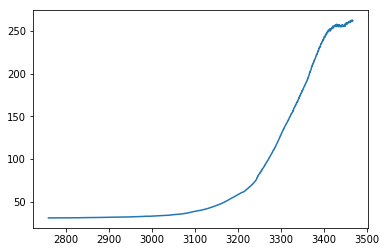

In [364]:
plt.plot(y1['T_per_1'].iloc[3500:6300])

Text(0.5,1,'Derivative of Motor position')

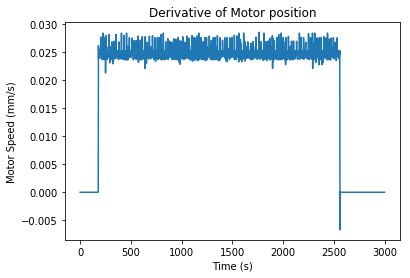

In [400]:
plt.plot(np.gradient(y1['motorB'].iloc[3500:6500], y1.index[3500:6500]))
plt.xlabel('Time (s)')
plt.ylabel('Motor Speed (mm/s)')
plt.title('Derivative of Motor position')

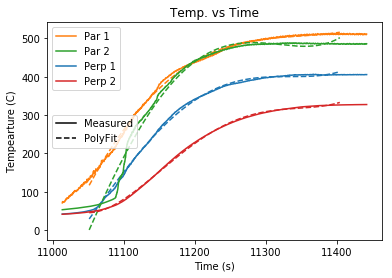

In [383]:
ps = pltt(y4, (1000,2400))

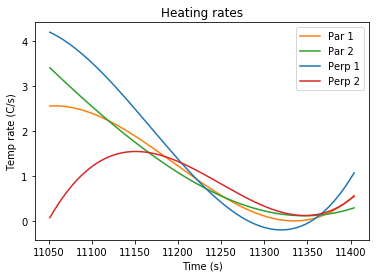

In [384]:
pltr(y4, (1000,2400), ps)

Text(0.5,0,'Time (s)')

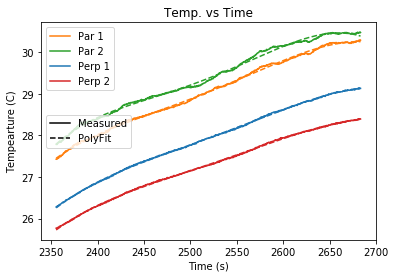

In [326]:
p = np.polyfit(y1.index[1900:3200], y1['T_par_1'].iloc[1900:3200], 4)
plt.plot(y1.index[1900:3200],np.polyval(p, y1.index[1900:3200]), label = 'PolyFit', ls='dashed', c='C0')
plt.plot(y1.index[1900:3200], y1['T_par_1'].iloc[1900:3200], label='Measured', c='C0')
po = np.polyfit(y1.index[1900:3200], y1['T_par_2'].iloc[1900:3200], 4)
plt.plot(y1.index[1900:3200],np.polyval(po, y1.index[1900:3200]), label = 'PolyFit', ls='dashed', c='C1')
plt.plot(y1.index[1900:3200], y1['T_par_2'].iloc[1900:3200], label='Measured', c='C1')
pol = np.polyfit(y1.index[1900:3200], y1['T_per_1'].iloc[1900:3200], 4)
plt.plot(y1.index[1900:3200],np.polyval(pol, y1.index[1900:3200]), label = 'PolyFit', ls='dashed', c='C2')
plt.plot(y1.index[1900:3200], y1['T_per_1'].iloc[1900:3200], label='Measured', c='C2')
pols = np.polyfit(y1.index[1900:3200], y1['T_per_2'].iloc[1900:3200], 4)
plt.plot(y1.index[1900:3200],np.polyval(pols, y1.index[1900:3200]), label = 'PolyFit', ls='dashed', c='C3')
plt.plot(y1.index[1900:3200], y1['T_per_2'].iloc[1900:3200], label='Measured', c='C3')
cs = [Line2D([0], [0], color='C1'),
      Line2D([0], [0], color='C2'),
      Line2D([0], [0], color='C0'),
      Line2D([0], [0], color='C3')]
ss = [Line2D([0], [0], color = 'k'), 
      Line2D([0], [0], color='k', linestyle='dashed')]
names = ['Par 1', 'Par 2', 'Perp 1', 'Perp 2']
first = plt.legend(cs, names, loc=2)
ax = plt.gca().add_artist(first)
plt.legend(ss, ['Measured', 'PolyFit'], loc=6)
plt.title('Temp. vs Time')
plt.ylabel('Tempearture (C)')
plt.xlabel('Time (s)')

Text(0.5,0,'Time (s)')

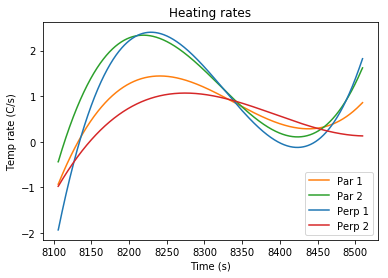

In [317]:
plt.plot(y3.index[2400:4000],np.gradient(np.polyval(p,y3.index[2400:4000]), y3.index[2400:4000]), c='C1')
plt.plot(y3.index[2400:4000],np.gradient(np.polyval(po,y3.index[2400:4000]), y3.index[2400:4000]), c='C2')
plt.plot(y3.index[2400:4000],np.gradient(np.polyval(pol,y3.index[2400:4000]), y3.index[2400:4000]), c='C0')
plt.plot(y3.index[2400:4000],np.gradient(np.polyval(pols,y3.index[2400:4000]), y3.index[2400:4000]), c='C3')
plt.legend(names)
plt.title('Heating rates')
plt.ylabel('Temp rate (C/s)')
plt.xlabel('Time (s)')

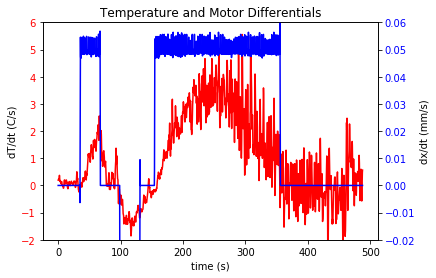

In [7]:
def two_scales(ax1, time, data1, data2, c1, c2):
    ax2 = ax1.twinx()

    ax1.plot(time, data1, color=c1)
    ax1.set_xlabel('time (s)')
    ax1.set_ylabel('dT/dt (C/s)')

    ax2.plot(time, data2, color=c2)
    ax2.set_ylabel('dx/dt (mm/s)')
    return ax1, ax2
s1 = np.gradient(b['Temperature'], b.index)
s2 = np.gradient(b['motor'], b.index)
# Create axes
fig, ax = plt.subplots()
ax1, ax2 = two_scales(ax, b.index, s1, s2, 'r', 'b')


# Change color of each axis
def color_y_axis(ax, color):
    """Color your axes."""
    for t in ax.get_yticklabels():
        t.set_color(color)
    return None
color_y_axis(ax1, 'r')
color_y_axis(ax2, 'b')
plt.title('Temperature and Motor Differentials')
ax2.set_ylim(-.02,.06)
ax1.set_ylim(-2, 6)
plt.show()

(-0.02, 0.06)

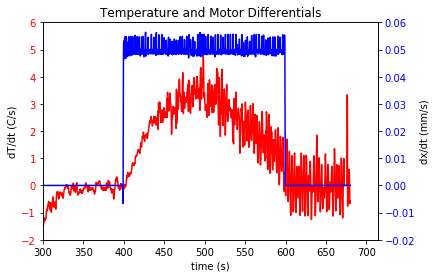

In [8]:
s1 = np.gradient(nb['Temperature'], nb.index)
s2 = np.gradient(nb['motor'], nb.index)


fig, ax = plt.subplots()
ax1, ax2 = two_scales(ax, nb.index, s1, s2, 'r', 'b')
color_y_axis(ax1, 'r')
color_y_axis(ax2, 'b')
plt.title('Temperature and Motor Differentials')
plt.xlim(300)
ax1.set_ylim(-2,6)
ax2.set_ylim(-.02,.06)

Text(0.5,1,'Temperature Map')

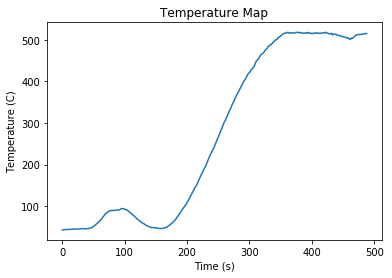

In [9]:
plt.plot(b['Temperature'])
plt.xlabel('Time (s)')
plt.ylabel('Temperature (C)')
plt.title('Temperature Map')

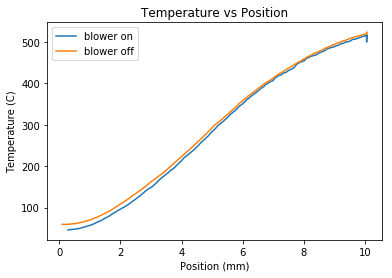

In [10]:
plt.plot(b['motor'][160:], b['Temperature'][160:], label = 'blower on')
plt.plot(nb['motor'][400:], nb['Temperature'][400:], label = 'blower off')
plt.xlabel('Position (mm)')
plt.ylabel('Temperature (C)')
plt.title('Temperature vs Position')
plt.legend()

In [11]:
p1 = np.polyfit(b['motor'][160:],b['Temperature'][160:], 4)
p2 = np.polyfit(nb['motor'][400:], nb['Temperature'][400:], 4)

In [12]:
print(p1,p2)

[  0.05337484  -1.9288045   19.46653895  -8.77899769  48.71733467] [  6.06002798e-02  -2.01424870e+00   1.95526002e+01  -8.82140717e+00
   6.14781560e+01]


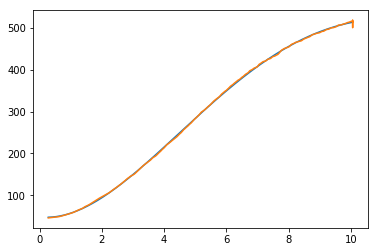

In [13]:
plt.plot(b['motor'][160:], np.polyval(p1, b['motor'][160:]))
plt.plot(b['motor'][160:], b['Temperature'][160:])

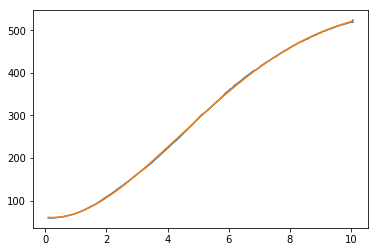

In [14]:
plt.plot(nb['motor'][400:], nb['Temperature'][400:])
plt.plot(nb['motor'][400:], np.polyval(p2, nb['motor'][400:]))

Text(0,0.5,'Temp. (C/s)')

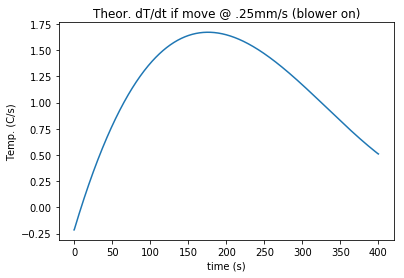

In [15]:
x = np.linspace(0,10,1000)
t = np.linspace(0,400,1000)
#plt.plot(t,x)
plt.plot(t, np.gradient(np.polyval(p2,x),t))
plt.title('Theor. dT/dt if move @ .25mm/s (blower on)')
plt.xlabel('time (s)')
plt.ylabel('Temp. (C/s)')

Text(0,0.5,'Temp. (C/s)')

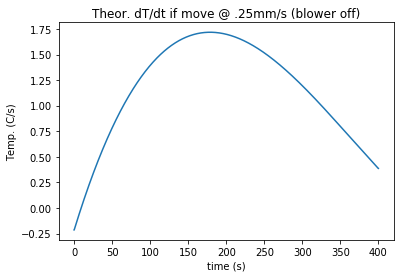

In [16]:
x = np.linspace(0,10,1000)
t = np.linspace(0,400,1000)
#plt.plot(t,x)
plt.plot(t, np.gradient(np.polyval(p1,x),t))
plt.title('Theor. dT/dt if move @ .25mm/s (blower off)')
plt.xlabel('time (s)')
plt.ylabel('Temp. (C/s)')

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:1772: RuntimeWarning: invalid value encountered in true_divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:1773: RuntimeWarning: divide by zero encountered in true_divide
  b = (dx2 - dx1) / (dx1 * dx2)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:1773: RuntimeWarning: invalid value encountered in true_divide
  b = (dx2 - dx1) / (dx1 * dx2)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:1774: RuntimeWarning: divide by zero encountered in true_divide
  c = dx1 / (dx2 * (dx1 + dx2))
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:1774: RuntimeWarning: invalid value encountered in true_divide
  c = dx1 / (dx2 * (dx1 + dx2))
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:1780: RuntimeWarning: invalid value encountered in add
  out[slice1] = a * f[slice2] + b * f[slice3] +

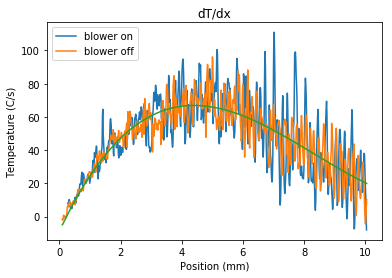

In [17]:
plt.plot(b['motor'][160:], np.gradient(b['Temperature'][160:],b['motor'][160:]), label = 'blower on')
plt.plot(nb['motor'][400:], np.gradient(nb['Temperature'][400:],nb['motor'][400:]), label = 'blower off')
plt.plot(nb['motor'][400:], np.gradient(np.polyval(p2, nb['motor'][400:]), nb['motor'][400:]))
plt.xlabel('Position (mm)')
plt.ylabel('Temperature (C/s)')
plt.title('dT/dx')
plt.legend()

In [55]:
a = [1,2,3,3, 4,7,7,4,1,4,5,7,1]
np.unique(np.delete(a,np.unique(a, return_index=True)[1]))

array([1, 3, 4, 7])

In [52]:
np.unique(a, return_index=True)

(array([1, 2, 3]), array([0, 1, 2], dtype=int64))